## ETF price-volume relationship  

To compare the difference between industries, we selected 6 sectors.  
Heavy Industry: DIA/XLI  
Retail: RTH  
Medical & Health: IHE/IBB/XLV  
Technology: QQQ/SMH  
Energy: XLE  
Financial: XLF  
Market: SPY  

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('industry_etf.csv')
df1.rename(columns={'Attributes':'Date'}, inplace=True)
df1 = df1.drop(index=1)
df1.set_index('Date', inplace=True)
df1.head()

,open,open.1,open.2,open.3,open.4,open.5,open.6,open.7,open.8,open.9,...,volume.13,volume.14,volume.15,volume.16,volume.17,volume.18,volume.19,volume.20,volume.21,volume.22
Date,,,,,,,,,,,,,,,,,,,,,
Symbols,DIA,IBB,IHE,ITA,ITB,IWM,IYC,IYR,IYT,IYZ,...,SPY,XHB,XLB,XLE,XLF,XLI,XLP,XLU,XLV,XLY
2015-05-01,163.1623,112.1416,159.572,116.0162,25.4884,114.6117,137.3856,64.0702,146.8248,27.9606,...,103399711,6020645,6749902,11354599,18331079,11017898,5158317,12507400,11508332,6110220
2015-05-04,164.1911,114.1163,161.801,116.2851,25.9207,115.1871,139.4599,64.7752,149.2922,27.9878,...,70927235,3616168,4150209,14434247,22232282,6096265,6710241,13323122,8561748,3920894
2015-05-05,164.0909,113.9607,162.4527,116.4195,25.7635,115.3946,139.1238,64.4694,148.9861,27.8426,...,113326156,4608939,3761331,16076343,30639814,10026905,6537353,18621205,11373760,7856800
2015-05-06,163.7631,113.1596,160.9226,115.5745,25.6161,114.2251,137.7025,63.2378,147.4656,27.5251,...,135060151,3936545,5015558,16388582,29753265,8247719,6233272,16976140,10152164,8298192


In [3]:
#set plot type
plt.rcParams['figure.figsize'] = (18, 4)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False #show minus

In [72]:
sel_etf = [0,18,2,1,21,10,12,16,17,13] #selected ETF(Industry, Medical & Health, Tech, Energy, Financial, Market)
def plot(t): #2 types
    for i in sel_etf:
        fig=plt.figure()
        if i == 0:
            i = ''
        else:
            i = '.'+str(i)
        plt.title(df1['close'+i][0])
        
        if t == 'n':
            close = df1['close'+i][2:].astype(float)
            volume = df1['volume'+i][2:].astype(float)
            volatility = df1['close'+i][2:].astype(float).pct_change().rolling(14).std()
            color = 'forestgreen'
            print(df1['close'+i][0]+'  close&volume corr  '+str(close.corr(volume))+'  close_volatility&volume corr  '+str(volatility.corr(volume[7:])))
            
        if t == 'pct':
            close = df1['close'+i][2:].astype(float).pct_change()
            volume = df1['volume'+i][2:].astype(float).pct_change()
            color = 'orangered'
            range_c = close.max() - close.min()
            range_v = volume.max() - volume.min()
            print(df1['close'+i][0]+'  close_pct&volume_pct corr  '+str(close.corr(volume))+'  close_range  '+str(range_c)+'  volume_range  '+str(range_v))
            
        close.plot(label='close',color='steelblue')    
        volume.plot(label='volume', secondary_y=True, color=color)
        
        handles,labels = [],[]
        for ax in fig.axes:
            for h,l in zip(*ax.get_legend_handles_labels()):
                handles.append(h)
                labels.append(l)

        plt.legend(handles,labels,loc=9)
        if t == 'n':
            fig=plt.figure(figsize=(18,2))
            plt.title('volatility 7d')
            volatility.plot(color='darkorange')

DIA  close&volume corr  -0.17687811569145032  close_volatility&volume corr  0.5181529227008131
XLI  close&volume corr  -0.022346618883252335  close_volatility&volume corr  0.2562206098133302
IHE  close&volume corr  -0.10397769492802185  close_volatility&volume corr  0.3290296182308342
IBB  close&volume corr  -0.2466634460753513  close_volatility&volume corr  0.4782455646809813
XLV  close&volume corr  -0.19788580590762112  close_volatility&volume corr  0.5012393719062846
QQQ  close&volume corr  0.19878598356518964  close_volatility&volume corr  0.5842393844287842
SMH  close&volume corr  0.3686086341047947  close_volatility&volume corr  0.4432936753877812
XLE  close&volume corr  -0.4853729587415249  close_volatility&volume corr  0.5874744870792888
XLF  close&volume corr  0.15300748514760196  close_volatility&volume corr  0.2872843271073807
SPY  close&volume corr  -0.33235969944550775  close_volatility&volume corr  0.5461645676349541


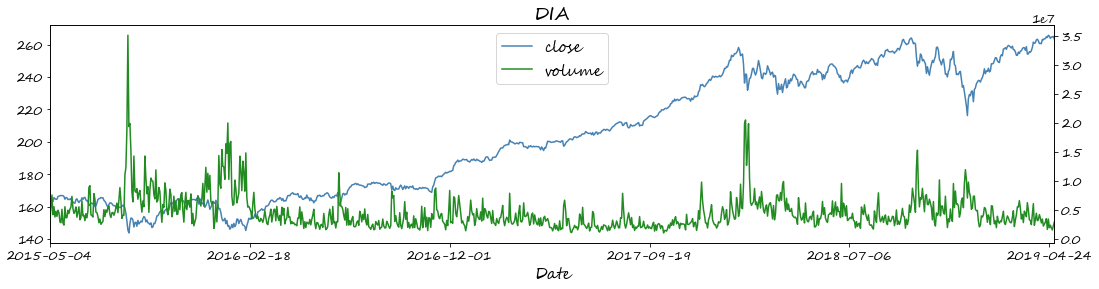

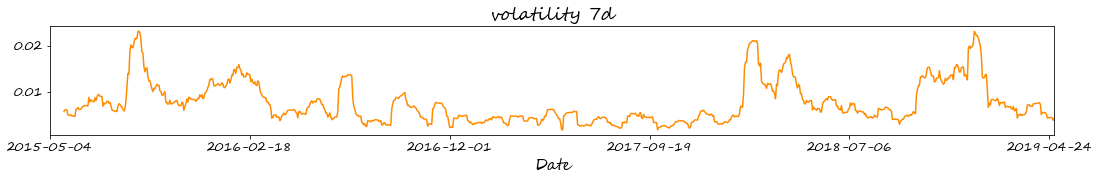

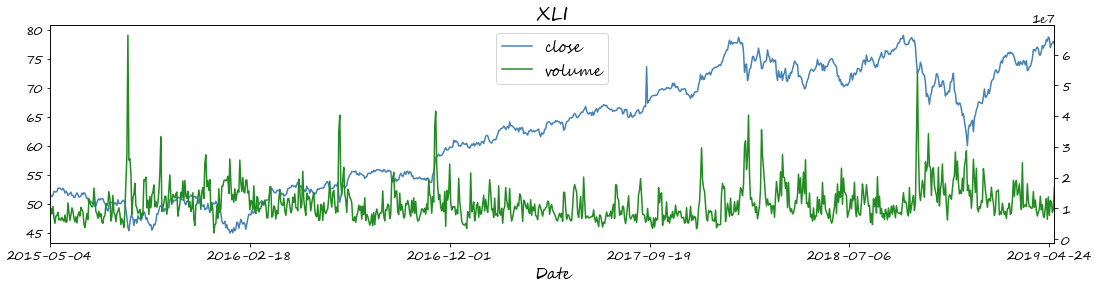

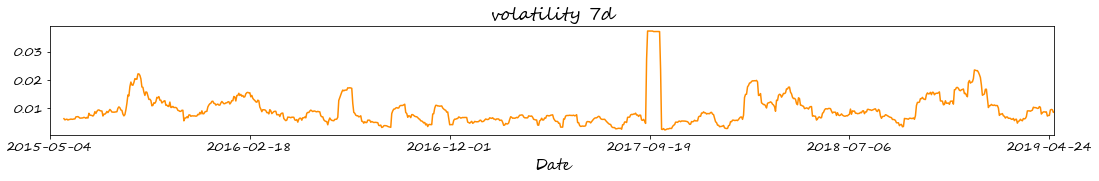

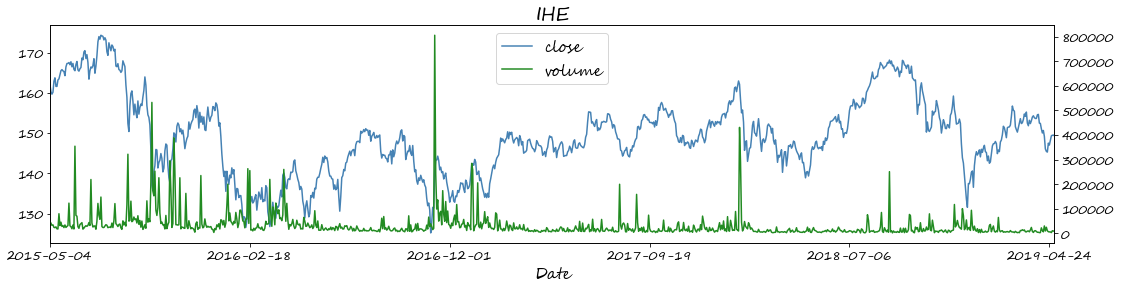

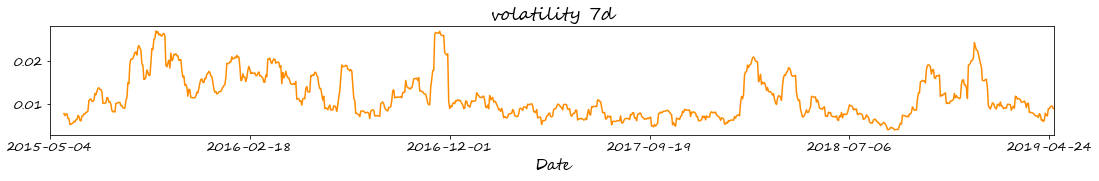

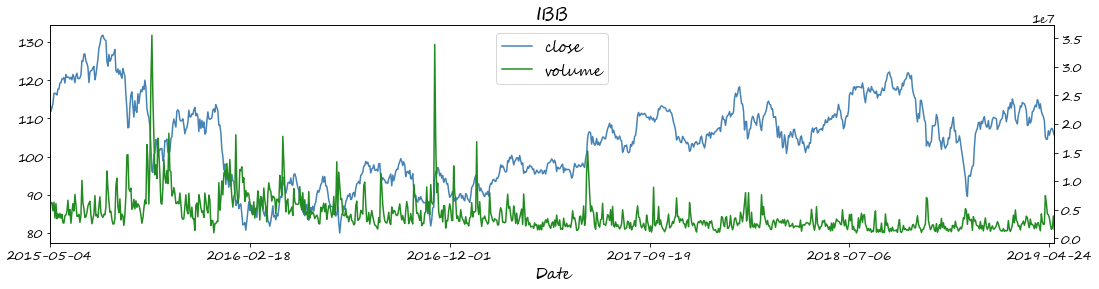

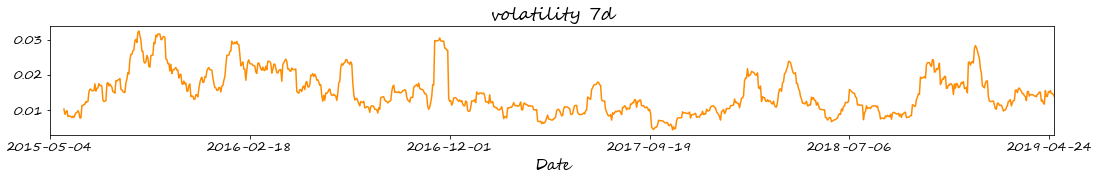

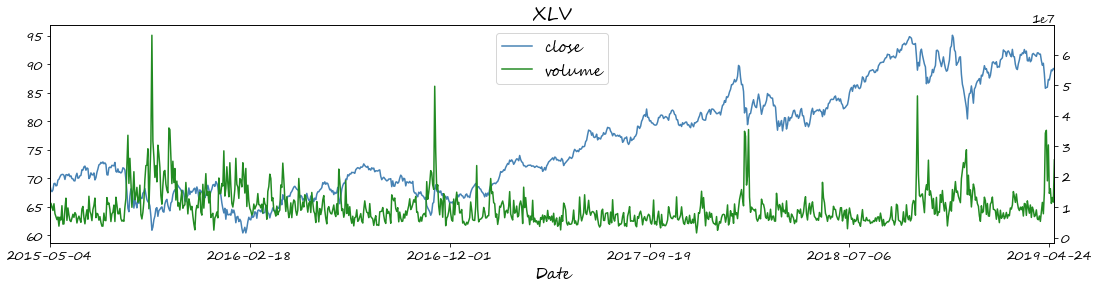

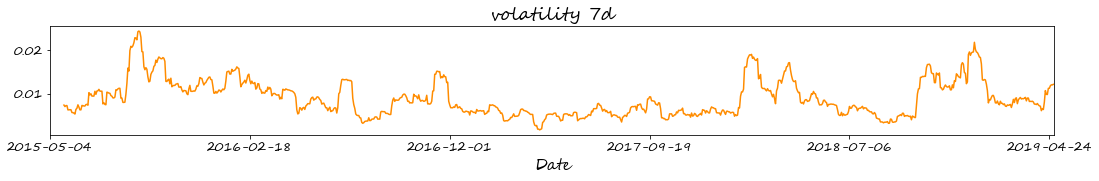

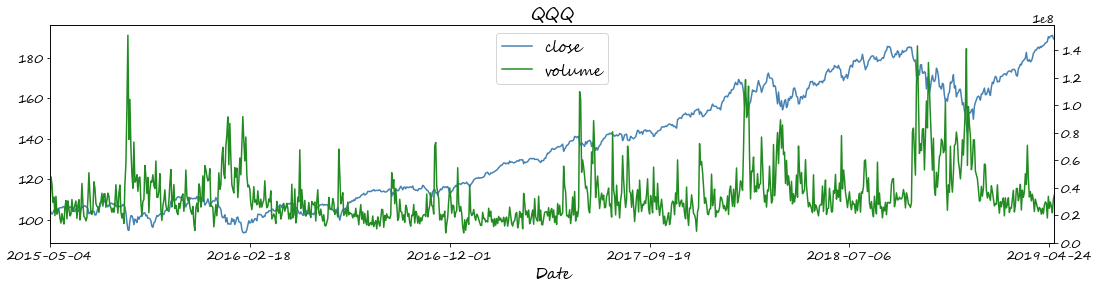

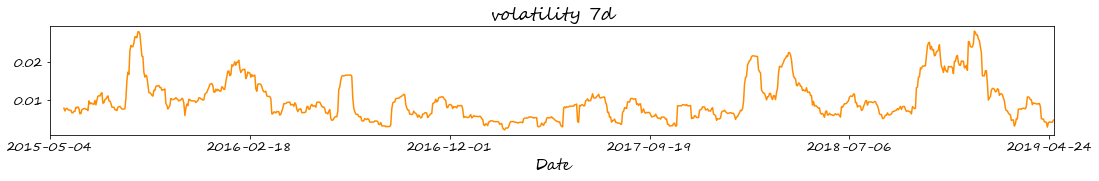

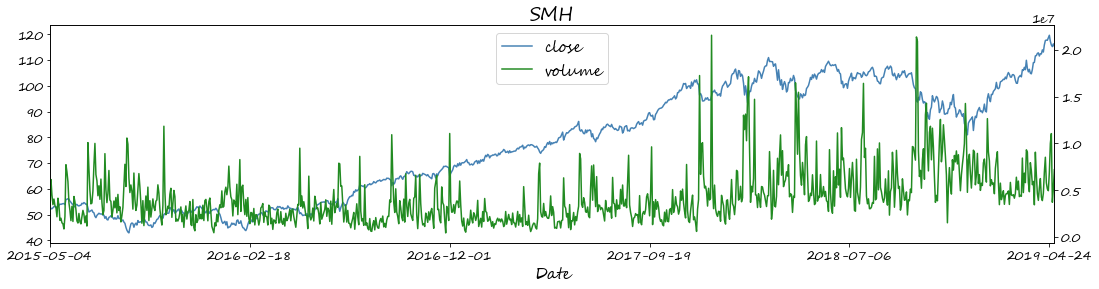

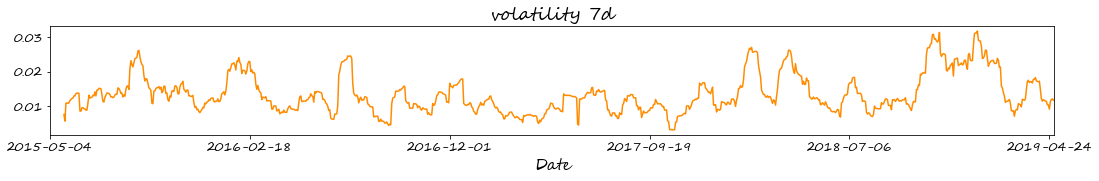

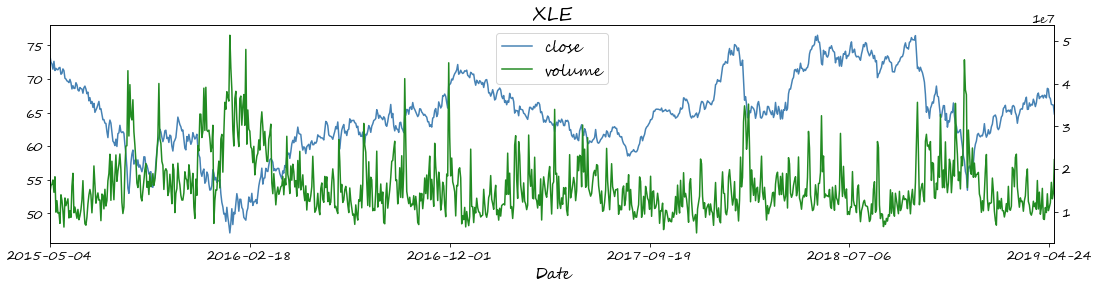

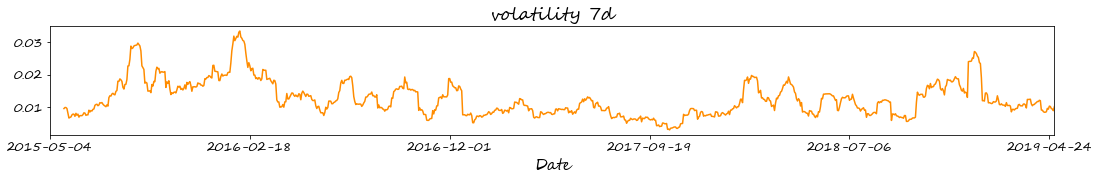

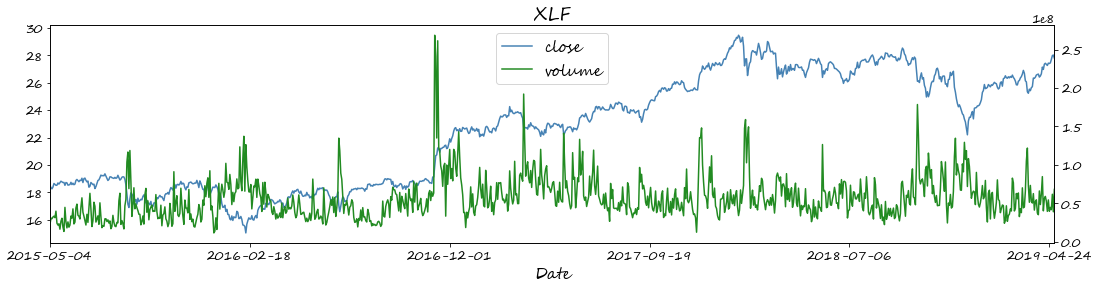

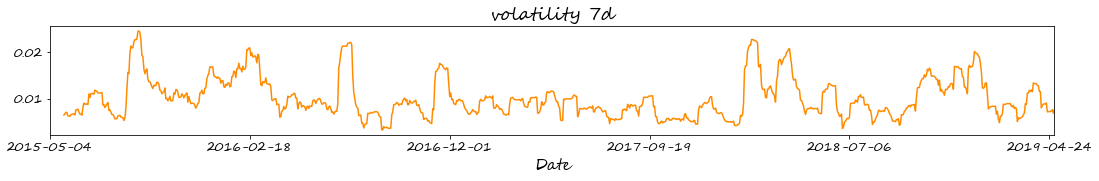

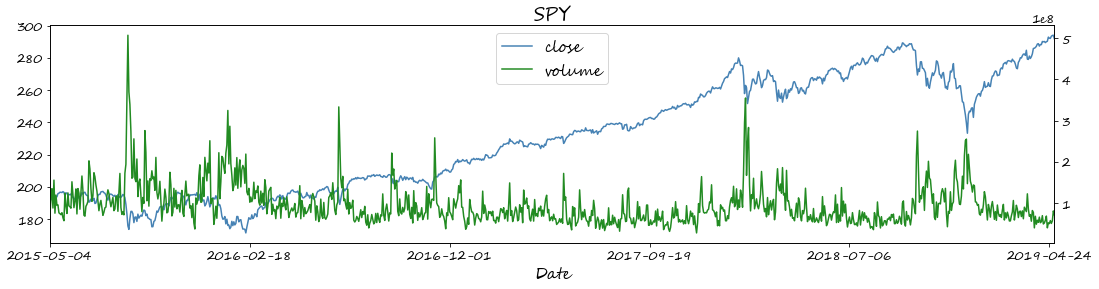

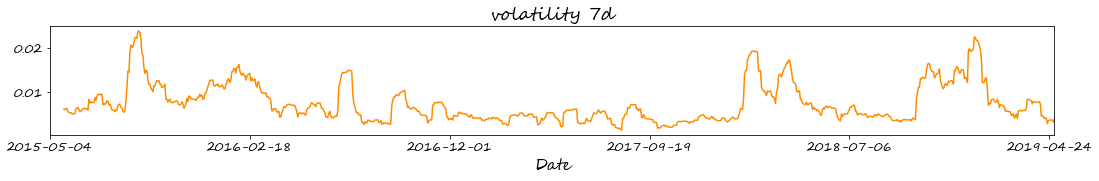

In [73]:
plot('n')

DIA  close_pct&volume_pct corr  -0.1856841448186753  close_range  0.094385261030965  volume_range  3.5847033875406904
XLI  close_pct&volume_pct corr  -0.1973452885827728  close_range  0.18848182367191124  volume_range  3.7413437338152167
IHE  close_pct&volume_pct corr  0.05793141534445768  close_range  0.13040734612015004  volume_range  55.9981866787365
IBB  close_pct&volume_pct corr  -0.13718514227677214  close_range  0.15260123118039992  volume_range  5.090453980013981
XLV  close_pct&volume_pct corr  -0.18442156813085767  close_range  0.08792681983843409  volume_range  3.2282765048993207
QQQ  close_pct&volume_pct corr  -0.2627964396989462  close_range  0.10820553408119615  volume_range  4.021965179817496
SMH  close_pct&volume_pct corr  -0.16117094493956785  close_range  0.1260037818749732  volume_range  8.434689015123578
XLE  close_pct&volume_pct corr  -0.04188321519117428  close_range  0.11592294833851713  volume_range  2.5792069233820683
XLF  close_pct&volume_pct corr  -0.111854966

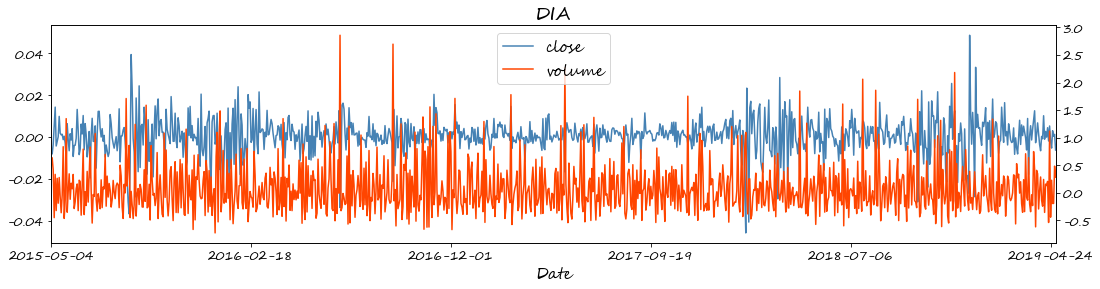

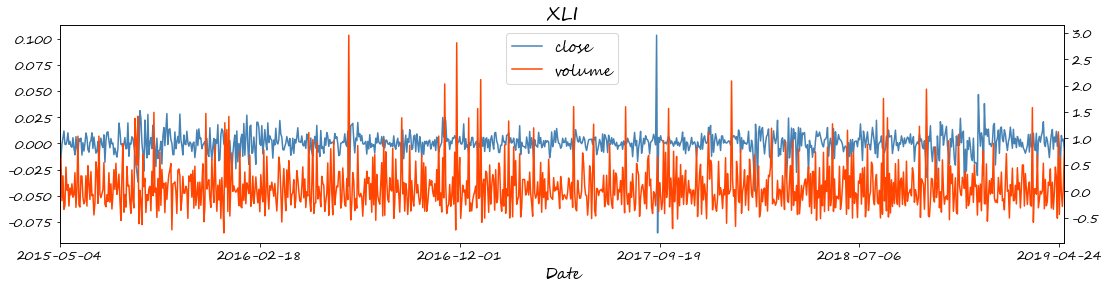

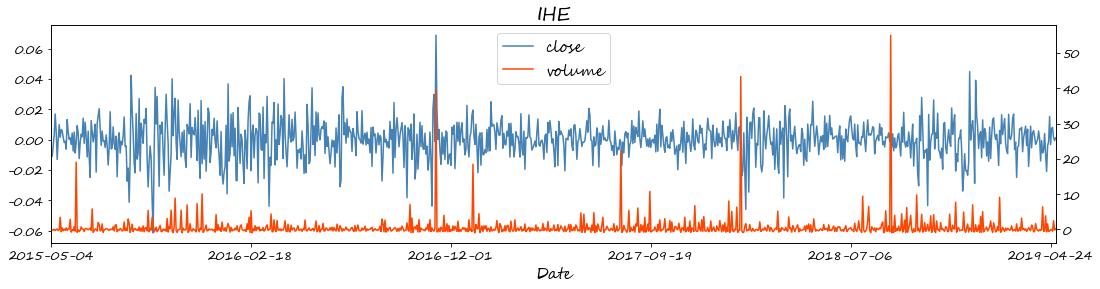

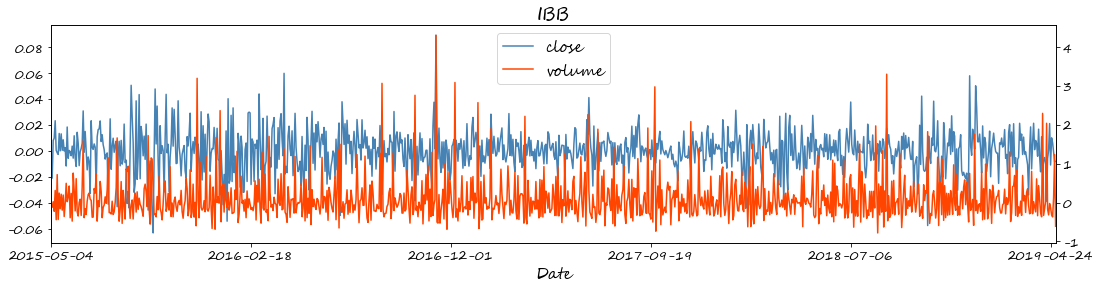

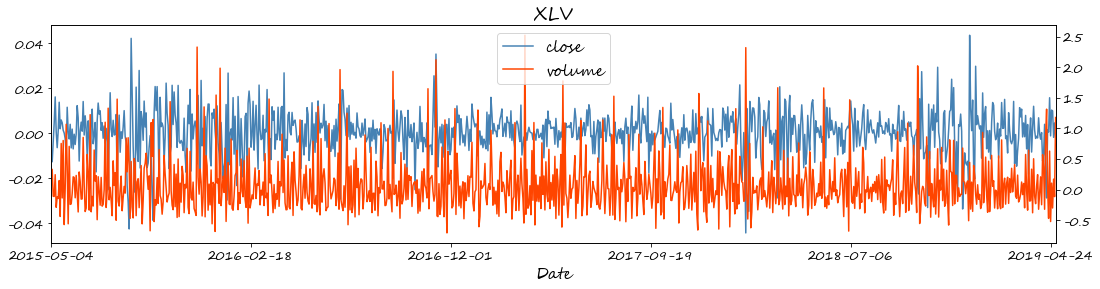

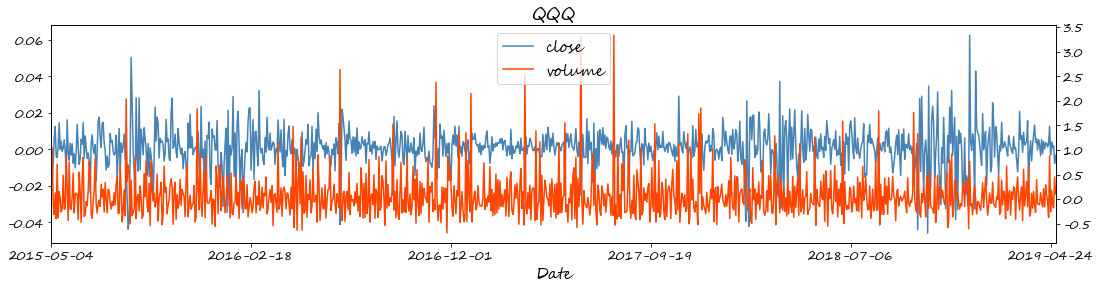

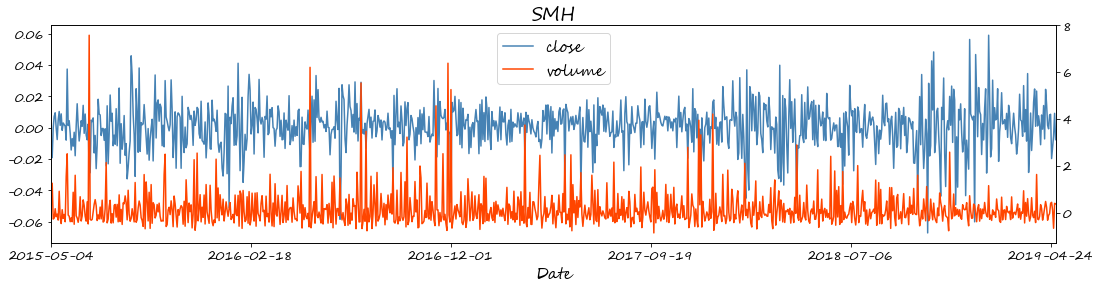

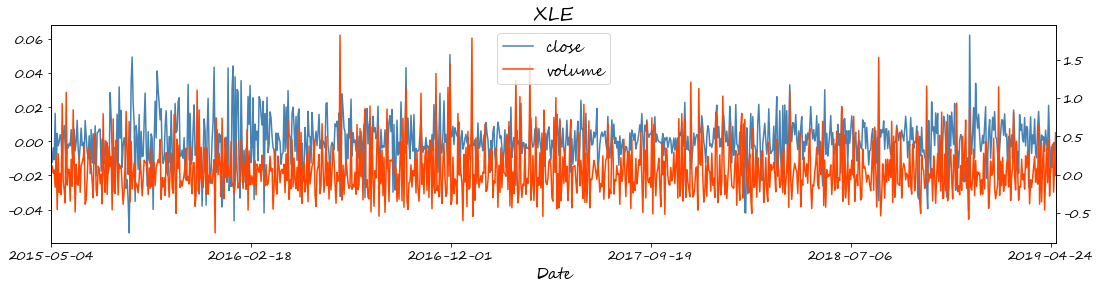

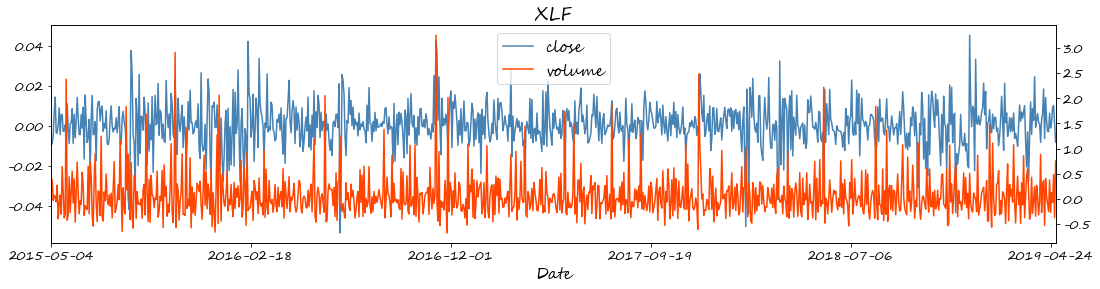

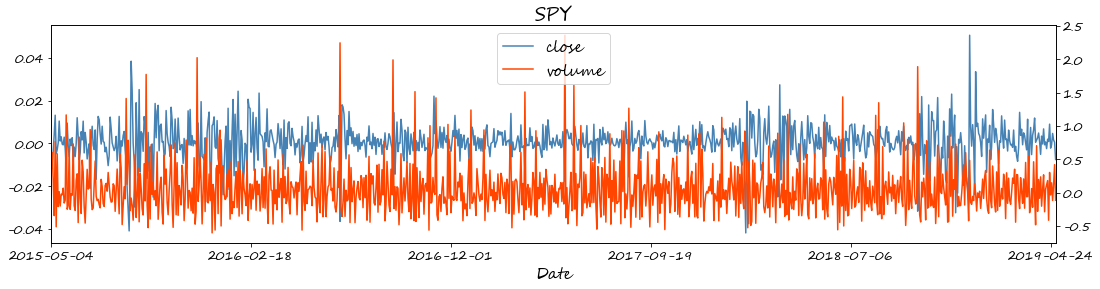

In [71]:
plot('pct')

2015/6/1 IHE 交易量暴漲  

In [86]:
#volatility
for i in sel_etf:
    if i == 0:
        i = ''
    else:
        i = '.' + str(i)
    volatility = df1['close'+i][2:].astype(float).pct_change().rolling(7).std()
    print(df1['close'+i][0]+'  '+str(volatility.max()))

DIA  0.02871499325011574
XLI  0.05456428599172837
IHE  0.03558841697460379
IBB  0.04082397128463452
XLV  0.029508530658194122
QQQ  0.034501498932401835
SMH  0.04054550355272896
XLE  0.03862400171584398
XLF  0.030479095817099112
SPY  0.02902859549041394


[164.2821 162.9802 162.4157 ... 264.7806 265.1298 263.4939] [3256866. 5316273. 7534180. ... 1522458. 2259245. 2902461.]
[ 3.25686600e+06 -2.05940700e+06 -9.59358700e+06 ...  1.23867195e+08
  1.26126440e+08  1.23223979e+08]
                0
0       3256866.0
1      -2059407.0
2      -9593587.0
3      -5450800.0
4         78786.0
5      -3674775.0
6      -8417571.0
7      -4566188.0
8        355242.0
9       4877393.0
10      7767896.0
11     10534483.0
12      5453707.0
13      8177938.0
14      5820913.0
15       291219.0
16      3879371.0
17       218520.0
18     -4705130.0
19      -356114.0
20     -5462352.0
21        19592.0
22     -7292862.0
23    -12521597.0
24    -16902138.0
25    -21624561.0
26    -16143703.0
27    -12428901.0
28    -16995651.0
29    -22498317.0
...           ...
976    98346224.0
977   102146234.0
978    95919745.0
979   100902199.0
980   104180917.0
981   101014763.0
982   103449142.0
983   107705001.0
984   113756712.0
985   111436664.0
986   114702192.0
987

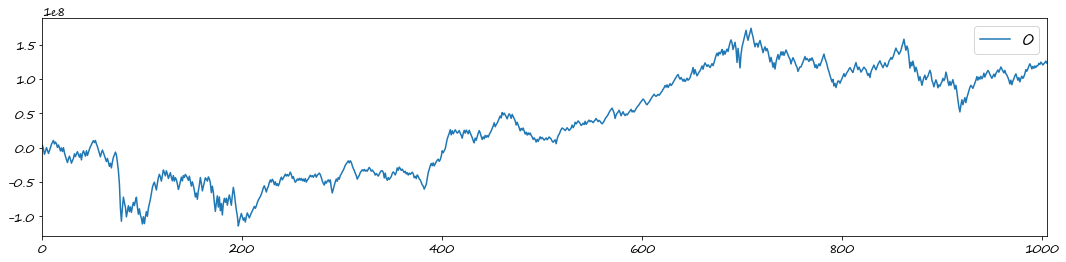

In [7]:
import talib as ta
import numpy as np
close = np.array(df1['close'][2:],dtype='float')
volume = np.array(df1['volume'][2:],dtype='float')
print(close,volume)
OBV = ta.OBV(close, volume)
print(OBV)
OBV = pd.DataFrame(OBV)
print(OBV)
OBV.plot()

#### Price Volume Trend(PVT) indicator  
* PVT(today) = Change * Volume(today) + PVT(yesterday)  
Change = (Close(today) - Close(yesterday)/Close(yesterday))  

In [8]:
close = df1['close'][2:].astype('float').reset_index()
volume = df1['volume'][2:].astype('float').reset_index()
data = pd.concat([close,volume], axis=1)

change_ = []
pvt_ = []

def pvt():
    for i in data['close'].index:
        
        if i == 0:
            pyes = data['volume'][i]
            pvt_.append(pyes)
            print(pyes)
            ch = 0
        else:
            ch = (data['close'][i] - data['close'][i-1])/data['close'][i-1]
            p = ch*data['volume'][i] + pyes
            print(pyes)
            pvt_.append(p)
            pyes = p
            
        change_.append(ch)
pvt()
data['change'] = change_
data['pvt'] = pvt_
data.head()

3256866.0
3256866.0
3214735.689888916
3188640.2217891095
3209308.792044941
3288573.892720078
3272681.442340833
3263251.3606690634
3263890.3826270425
3312630.884752959
3321136.7486951808
3324304.890262457
3328092.3891130122
3321980.265267326
3323173.121065729
3316339.018160032
3258995.865944237
3281874.5552055994
3277235.2452167566
3245187.940704449
3252190.0109545705
3245114.2477645096
3267328.0654353187
3199815.593789701
3179098.6462869034
3162165.4955867655
3159510.969096971
3231988.8732253225
3243954.119541481
3205780.5338356714
3174138.100226617
3194562.579473138
3200061.6351937396
3267503.1213129335
3243614.493384536
3269739.1331699435
3273185.002464344
3232313.352721367
3217052.2640861096
3230099.829267749
3056919.3446688876
3066297.3672401584
3103456.939263406
3095548.509527828
3087714.7111965427
3129565.7185065
3028155.339217269
3034959.892819737
3090216.881555781
3138036.544389254
3149243.3973079664
3149433.4351812354
3159532.32406972
3154066.299614635
3156527.5921852966
31086

1294261.7653538052
1295048.973978187
1294669.999419574
1299311.0047860078
1300963.0412574667
1298719.096389668
1297788.4993994494
1294833.6613339453
1292801.2314718438
1300805.9684058065
1300972.2568855677
1206204.4850365038
1221996.8042352265
1255619.5835077758
1265132.78875802
1272921.6250638054
1284580.832773879
1292542.9726370927
1292324.3348061594
1290652.4515321197
1289076.306582349
1301263.090194994
1306845.4984320288
1306391.9821582125
1301545.9328042115
1304106.018204221
1305448.7476552008
1321777.4477618206
1317102.189699615
1328185.3645501616
1340131.8829626963
1338327.4551989704
1341264.4614046798
1354659.0541104074
1350394.8592825513
1345329.7302535211
1343312.6541542755
1343375.654619124
1344555.5550702105
1335846.1467144536
1364723.4911118902
1331454.4952957756
1338023.4518905205
1350539.1468367912
1351293.8948300714
1335867.0530221893
1341530.62269546
1341206.4666523433
1341132.7595957692
1353419.1486582183
1355115.8347971316
1364010.3905317415
1363585.6271327618
135818

55331.07205992643
62251.630071606174
62251.630071606174
77836.38679248303
74876.97311458236
92958.40236163499
88966.04815174475
76766.33927044184
82533.41225141103
83106.89172272905
86086.4466976781


,Date,close,Date,volume,change,pvt
0,2015-05-04,164.2821,2015-05-04,3256866.0,0.000000,3.256866e+06
1,2015-05-05,162.9802,2015-05-05,5316273.0,-0.007925,3.214736e+06
2,2015-05-06,162.4157,2015-05-06,7534180.0,-0.003464,3.188640e+06
3,2015-05-07,163.2260,2015-05-07,4142787.0,0.004989,3.209309e+06
4,2015-05-08,165.5658,2015-05-08,5529586.0,0.014335,3.288574e+06


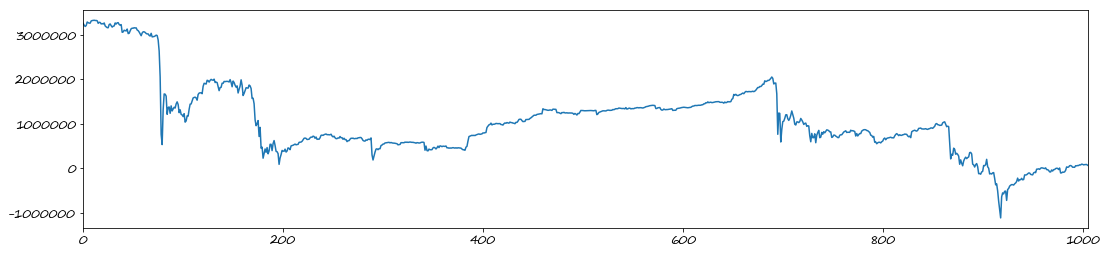

In [9]:
data['pvt'].plot()

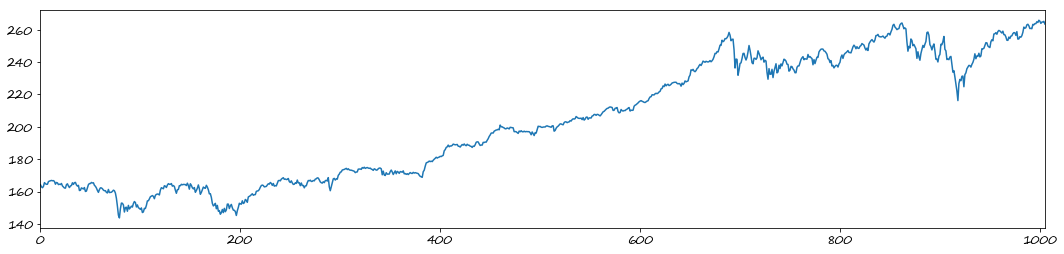

In [10]:
data['close'].plot()

[Python TA-Lib](https://kknews.cc/zh-tw/other/x2zpk4r.html)  
[pandas-statistics](https://pythonprogramming.net/pandas-statistics-correlation-tables-how-to/)  
[量價關係分析](https://kknews.cc/zh-tw/other/x2zpk4r.html)  
[股市技術分析利器之TA-Lib（一）](https://kknews.cc/zh-tw/other/pyyvkjz.html)  
[stock_market_indicators](https://github.com/voice32/stock_market_indicators/blob/master/indicators.py)  
[most-volatile-sectors](https://www.investopedia.com/financial-edge/0712/the-8-most-volatile-sectors.aspx)  
[4-volatile-industries](https://www.timothysykes.com/blog/4-volatile-industries-and-some-common-events/)  

In [11]:
df = pd.read_csv('data0.csv')
#df[['Close','Volume']].plot(secondary_y = ['Volume'])